In [43]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

def setup_frame(setup):
    frames = [pd.read_csv(data) for data in glob(f'../coding-traffic/{setup}/*/traffic.csv')]
    data = pd.concat(frames, ignore_index=True)
    return pd.DataFrame([
        [setup, data['outbound'].sum(), data['time'].sum()]],
        columns=['setup', 'traffic', 'cpu'])

frames = [setup_frame(setup) for setup in ('entropy-s', 'entropy-m', 'kademlia-s', 'kademlia-m', 'idle')]
data = pd.concat(frames, ignore_index=True)
idle_i = data[data["setup"] == "idle"].index
idle_traffic = data.loc[idle_i]["traffic"]
idle_cpu = data.loc[idle_i]["cpu"]
data["traffic"] = data["traffic"].apply(lambda t: t - idle_traffic)
data["cpu"] = data["cpu"].apply(lambda c: c - idle_cpu)
data

,setup,traffic,cpu
0,entropy-s,1244499461562,17163.30182
1,entropy-m,1246314375431,17643.32132
2,kademlia-s,5513745291851,55005.22742
3,kademlia-m,5928142386483,42667.52202
4,idle,0,0.00000


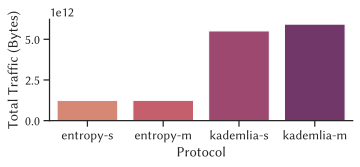

In [44]:
sns.catplot(data=data,
    kind='bar',
    order=["entropy-s", "entropy-m", "kademlia-s", "kademlia-m"],
    x="setup", y="traffic",
    height=2.56, aspect=2,
    palette='flare') \
.set_xlabels("Protocol") \
.set_ylabels("Total Traffic (Bytes)") \
.savefig("../coding-traffic.pdf")

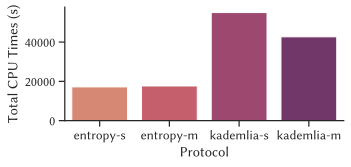

In [45]:
sns.catplot(data=data,
    kind='bar',
    order=["entropy-s", "entropy-m", "kademlia-s", "kademlia-m"],
    x="setup", y="cpu",
    height=2.56, aspect=2,
    palette='flare') \
.set_xlabels("Protocol") \
.set_ylabels("Total CPU Times (s)") \
.savefig("../coding-cpu.pdf")